# LTV Heatmap
Have to learn how to make an LTV Heatmap using Cohort analysis?

In [68]:
# Libraries
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns # for plotting heatmap
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
df = pd.read_csv('payments.csv')

### Preliminary Exploration

In [3]:
df.head()

,account_id,payment_id,payment_usd,payment_date
0,hbQ5GR1L54QtQAB,QhQfR06N8dQAO,50.00,2021-01-28
1,vsQ5GR1KF4QtQAH,Q7QfR06N8dQAO,968.07,2021-01-28
2,5jQ5GR1Uz4QtQAB,Q6QfR06N8dQAO,763.67,2021-01-28
3,hnQ5GR1O34QtQAB,Q2QfR06N8dQAO,2378.57,2021-01-28
4,ztQ5GR1Ha4QtQAF,Q0QfR06N8dQAO,2855.84,2021-01-28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    6890 non-null   object 
 1   payment_id    6890 non-null   object 
 2   payment_usd   6890 non-null   float64
 3   payment_date  6890 non-null   object 
dtypes: float64(1), object(3)
memory usage: 215.4+ KB


In [33]:
# First and last payment_dates
print(f"The first payment date in our data is {df['payment_date'].min()}")
print(f"The last payment date in our data is {df['payment_date'].max()}")

The first payment date in our data is 2020-02-23 00:00:00
The last payment date in our data is 2021-01-28 00:00:00


In [ ]:
user_counts = pd.value_counts(df['account_id'])
user_counts.head()

xqQ5GR06N4QtQAC    28
GzQ5GR1Fn4QtQAJ    27
nUQ5GR1EK4QtQAT    25
RcQ5GR0p44QtQAI    24
cwQ5GR15j4QtQAE    24
Name: account_id, dtype: int64

In [21]:
payment_id_counts = pd.value_counts(df['payment_id']).to_frame().rename(columns={'payment_id':'count'})
payment_id_counts

,count
CBQfR02t8dQA2,2
BtQfR02t8dQAM,2
AmQfR02t8dQAM,2
i4QfR05g8dQAA,2
i5QfR05g8dQAA,2
...,...
hwQfR0638dQAE,1
hxQfR0638dQAE,1
hyQfR0638dQAE,1
hzQfR0638dQAE,1


Weird....some of the payment IDs are duplicates, but theyre associated with different accounts?

### Cleaning / Manipulating 
Things to do:
- determine if duplicates are a problem
- Convert `payment_date` column to datetime
- Add YearMonth Column
- Find month of first purchase (cohort month)

In [19]:
# look for missing values
df.isna().sum()

account_id      0
payment_id      0
payment_usd     0
payment_date    0
dtype: int64

We saw before that there are some payment duplicates. Let's get a list of all the different duplicates


In [11]:
# Get DataFrame with only these payment ids
df.loc[df.duplicated(subset='payment_id', keep=False)].sort_values(by='payment_id')

,account_id,payment_id,payment_usd,payment_date
3821,O1Q5GR1SY4QtQAL,3iQfR02t8dQAE,125.00,2020-09-12
3378,10Q5GR0V04QtQAB,3iQfR02t8dQAE,14829.55,2020-09-30
3762,XrQ5GR1SZ4QtQAP,3sQfR02t8dQAE,250.00,2020-09-15
3842,aoQ5GR18t4QtQAA,3sQfR02t8dQAE,50.00,2020-09-11
3761,JQQ5GR1Rk4QtQAZ,3tQfR02t8dQAE,250.00,2020-09-15
...,...,...,...,...
5154,QmQ5GR1Ie4QtQAN,vtQfR05h8dQAE,250.00,2020-07-04
3896,YWQ5GR1L64QtQA3,wHQfR02t8dQAU,500.10,2020-09-08
3111,IfQ5GR0p64QtQAM,wHQfR02t8dQAU,2728.06,2020-10-09
1321,IfQ5GR1SC4QtQAL,yWQfR06N8dQAS,75.00,2020-12-10


We can see above that even though the `payment_id` are duplicated (twice for each), they appear to be associated with different values, dates, and accounts. Therefore it is justified to be keeping this data in our dataset, and treat the duplication as an artifact of the data entry.

In [16]:
# Convert the payment_date to datetime
df['payment_date'] = pd.to_datetime(df['payment_date'])


In [20]:
# Function to get the month for each payment date
def get_month(x):
    return dt.datetime(x.year,x.month,1)

#New column for payment month
df['payment_month'] = df['payment_date'].apply(get_month)

In [26]:
# Lets get the Cohort Group (month) for each customer
df_cohort = df.groupby('account_id')['payment_month']

In [27]:
# Add cohort data onto our original DataFrame
df['cohort'] = df_cohort.transform(min)
df.head()

,account_id,payment_id,payment_usd,payment_date,payment_month,cohort
0,hbQ5GR1L54QtQAB,QhQfR06N8dQAO,50.00,2021-01-28,2021-01-01,2020-05-01
1,vsQ5GR1KF4QtQAH,Q7QfR06N8dQAO,968.07,2021-01-28,2021-01-01,2020-04-01
2,5jQ5GR1Uz4QtQAB,Q6QfR06N8dQAO,763.67,2021-01-28,2021-01-01,2020-10-01
3,hnQ5GR1O34QtQAB,Q2QfR06N8dQAO,2378.57,2021-01-28,2021-01-01,2020-08-01
4,ztQ5GR1Ha4QtQAF,Q0QfR06N8dQAO,2855.84,2021-01-28,2021-01-01,2020-03-01


In [34]:
# Check to make sure this makes sense
df.sort_values(by=['account_id','payment_month']).head(20)

,account_id,payment_id,payment_usd,payment_date,payment_month,cohort
2889,09Q5GR1T44QtQAF,orQfR02t8dQAA,500.0,2020-10-19,2020-10-01,2020-10-01
2054,09Q5GR1T44QtQAF,dGQfR0638dQAU,500.0,2020-11-19,2020-11-01,2020-10-01
1106,09Q5GR1T44QtQAF,wmQfR06N8dQAC,502.5,2020-12-19,2020-12-01,2020-10-01
255,09Q5GR1T44QtQAF,oHQfR06N8dQAW,252.5,2021-01-19,2021-01-01,2020-10-01
73,0BQ5GR1dd4QtQAU,NuQfR06N8dQAO,500.0,2021-01-26,2021-01-01,2021-01-01
2927,0EQ5GR1U94QtQAV,vlQfR02t8dQAA,400.0,2020-10-17,2020-10-01,2020-10-01
3003,0EQ5GR1U94QtQAV,CUQfR02t8dQAY,400.0,2020-10-14,2020-10-01,2020-10-01
2119,0EQ5GR1U94QtQAV,e0QfR0638dQAE,508.5,2020-11-17,2020-11-01,2020-10-01
2184,0EQ5GR1WQ4QtQAT,i6QfR0638dQAE,250.0,2020-11-15,2020-11-01,2020-11-01
1223,0EQ5GR1WQ4QtQAT,6fQfR06N8dQAC,250.0,2020-12-15,2020-12-01,2020-11-01


Looks Good! Let's now find out the Period from Cohort month for each transaction. This is the difference between the `cohort` and `payment_month` columns

In [40]:
# New column for period of each entry
df['period'] = ((df['payment_date'] - df['cohort'])/np.timedelta64(1, 'M')) # difference in dates
df['period'] = df['period'].astype('int')
df.sort_values(by=['period'], ascending=False).head(20)

,account_id,payment_id,payment_usd,payment_date,payment_month,cohort,period
125,PrQ5GR07s4QtQAI,OBQfR06N8dQA4,100.00,2021-01-24,2021-01-01,2020-02-01,11
616,cuQ5GR0o74QtQAA,6XQfR06N8dQAW,2245.15,2021-01-08,2021-01-01,2020-02-01,11
105,k0Q5GR0t34QtQAA,QTQfR06N8dQA4,858.84,2021-01-24,2021-01-01,2020-02-01,11
34,LLQ5GR0bx4QtQA2,PoQfR06N8dQAO,125.00,2021-01-27,2021-01-01,2020-02-01,11
103,TqQ5GR11G4QtQAK,NjQfR06N8dQAO,250.00,2021-01-25,2021-01-01,2020-02-01,11
40,qSQ5GR14r4QtQAU,OTQfR06N8dQA4,50.00,2021-01-27,2021-01-01,2020-02-01,11
44,1hQ5GR0eA4QtQAG,NqQfR06N8dQAO,500.00,2021-01-27,2021-01-01,2020-02-01,11
627,v5Q5GR0Qs4QtQAB,6QQfR06N8dQAW,952.54,2021-01-08,2021-01-01,2020-02-01,11
148,GvQ5GR1Be4QtQAN,PWQfR06N8dQA4,50.39,2021-01-23,2021-01-01,2020-02-01,11
48,gMQ5GR19b4QtQAU,NcQfR06N8dQAO,1161.25,2021-01-27,2021-01-01,2020-02-01,11


### Calculating LTV
We will create a function to calculate each cohorts LTV

### Visualisation (Heatmap)
Finally we can use this data to create our LTV heatmap

In [106]:
# First need a new DataFrame for our cohort sizes
group = df.groupby(['cohort','period'])
cohort_df = group[['account_id','payment_usd']].agg({'account_id':'nunique','payment_usd':'mean'}).reset_index().rename(columns={'account_id':'cohort_size','payment_usd':'avg_ltv'})
cohort_df.head()

,cohort,period,cohort_size,avg_ltv
0,2020-02-01,0,85,677.662706
1,2020-02-01,1,77,659.392500
2,2020-02-01,2,68,691.814937
3,2020-02-01,3,63,819.491486
4,2020-02-01,4,64,894.922192


In [107]:
# Need the heatmap matrix
ltv_matrix = cohort_df[['cohort','period','avg_ltv']].pivot(index='cohort',columns='period')
ltv_matrix

avg_ltv                                                  \
period              0           1           2           3           4    
cohort                                                                   
2020-02-01  677.662706  659.392500  691.814937  819.491486  894.922192   
2020-03-01  449.927372  498.733346  528.808077  588.164337  623.425583   
2020-04-01  227.986944  358.366364  336.056562  386.477500  462.551379   
2020-05-01  305.541429  370.206667  441.316970  531.792500  545.837778   
2020-06-01  244.065088  299.272200  382.592222  459.300200  650.701020   
2020-07-01  192.313247  382.367576  493.608333  575.467302  712.371000   
2020-08-01  165.195135  342.565370  415.466429  602.635814  854.206104   
2020-09-01  181.908089  267.032500  410.055800  454.155521  542.924658   
2020-10-01  232.602037  505.076395  659.029130  821.751884         NaN   
2020-11-01  307.378067  425.755688  571.673253         NaN         NaN   
2020-12-01  296.067143  453.476812         NaN         NaN         NaN   
2021-01-01  310.747143         NaN         NaN         NaN         NaN   

                                                                            \
period              5            6            7            8            9    
cohort                                                                       
2020-02-01  972.075652  1015.279420  1102.649429  1384.378696  1361.847377   
2020-03-01  689.663274   695.399826   740.502613   915.211535  1456.667143   
2020-04-01  517.907500   559.913704   580.979600   558.961538   602.894783   
2020-05-01  702.416429   730.701429   685.024000   719.960000          NaN   
2020-06-01  657.497907  1007.423400   827.169211          NaN          NaN   
2020-07-01  843.080333   711.637609          NaN          NaN          NaN   
2020-08-01  645.110580          NaN          NaN          NaN          NaN   
2020-09-01         NaN          NaN          NaN          NaN          NaN   
2020-10-01         NaN          NaN          NaN          NaN          NaN   
2020-11-01         NaN          NaN          NaN          NaN          NaN   
2020-12-01         NaN          NaN          NaN          NaN          NaN   
2021-01-01         NaN          NaN          NaN          NaN          NaN   

                                     
period               10          11  
cohort                               
2020-02-01  2289.566212  988.782222  
2020-03-01  1038.207474         NaN  
2020-04-01          NaN         NaN  
2020-05-01          NaN         NaN  
2020-06-01          NaN         NaN  
2020-07-01          NaN         NaN  
2020-08-01          NaN         NaN  
2020-09-01          NaN         NaN  
2020-10-01          NaN         NaN  
2020-11-01          NaN         NaN  
2020-12-01          NaN         NaN  
2021-01-01          NaN         NaN

In [133]:
# Function for plotting the heatmap
def plot_heatmap(cohort_df, cohort_matrix, title, x_title, y_title, x_ticks, y_ticks, if_annot=True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7), gridspec_kw={'width_ratios':(1,14)})
    
    #Bar plot for cohort size
    Cohorts = sns.barplot(y = 'cohort', x = 'cohort_size', data = cohort_df, palette='Blues_r', ax = ax1)
    Cohorts.yaxis.get_label().set_visible(False)
    Cohorts.set(yticklabels=[])
    Cohorts.set(yticks=[])
    vals = Cohorts.get_xticks()
    
    
    # Heatmap for LTV
    Heatmap = sns.heatmap(cohort_matrix, cmap='RdYlBu', center=1000, vmax=2000, annot=if_annot, fmt='0.2f', ax=ax2)
    Heatmap.set_yticklabels(y_ticks)
    Heatmap.set_xticklabels(x_ticks)
    Heatmap.set(xlabel=x_title, ylabel=y_title)
    
    plt.title(title)
    
    plt.tight_layout()
    
    fig.show()

C:\Users\bwolk\AppData\Local\Temp\ipykernel_21524\4217594091.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


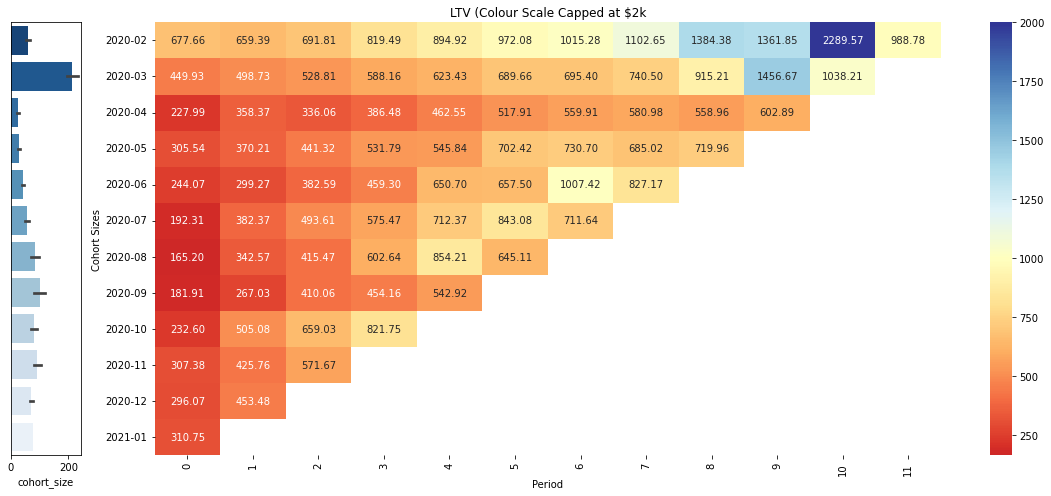

In [134]:
# Lets show The Heatmap!
plot_heatmap(cohort_df, ltv_matrix, "LTV (Colour Scale Capped at $2k", "Period", "Cohort Sizes", range(12), ltv_matrix.index.strftime('%Y-%m'), if_annot=True)